# Ford GoBike Trip Data Exploration
## by Golden Chikaire Egbua

## Investigation Overview


> In this exploration of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system.


## Dataset Overview

Ford GoBike is the Bay Area's bike share system, introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Having the expectations that once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week and riders have access to all bikes in the network when they become a member or purchase a pass.

The dataset originally had 183,412 entries and 16 columns that were mostly numeric variables. The following are the initial collumns:

* duration_sec
* start_time
* end_time
* start_station_id
* start_station_name
* start_station_latitude
* start_station_longitude
* end_station_id
* end_station_name
* end_station_latitude
* end_station_longitude
* bike_id
* user_type
* member_birth_year
* member_gender
* bike_share_for_all_trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('fordgobike_trip_data_master.csv')
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,distance_km,speed,member_age,member_age_groups
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,False,Thu,17,0.545,0.01,35,31 - 40
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,False,Thu,12,2.705,0.04,47,41 - 50
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,False,Thu,17,0.261,0.01,30,21 - 30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,True,Thu,23,2.409,1.52,45,41 - 50
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,False,Thu,23,3.332,1.86,60,51 - 60


In [3]:
# Set visualization style
sb.set_style('whitegrid')
sb.set_context("talk")

## (Visualization 1)
>**Insight:** Which gender and User Type patronize the Ford GoBike System the most according to our data?

> * The pie chart shows that majority of the users of the bike share system are male, representing 74.4% of the total users, while female represented 23.5% and other represented 2.1%.
> * The majority of users of the Ford Go Bike System are Subscribers (i.e. users who subscribe to the monthly membership), representing 90.4% of the total users, while Customers represented 9.6%

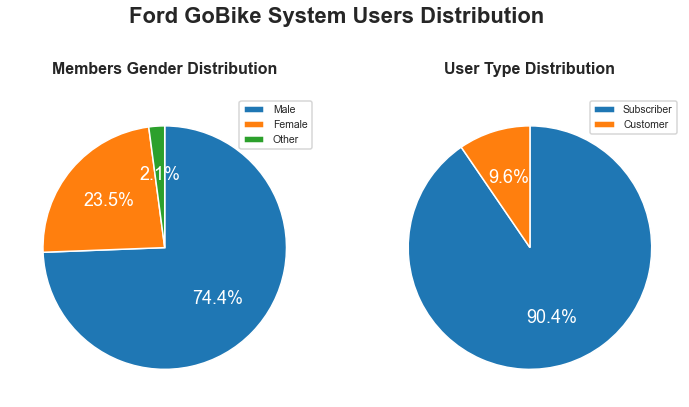

In [4]:
plt.figure(figsize = (12,7))
plt.suptitle('Ford GoBike System Users Distribution', fontsize=22, fontweight='bold')
# Usage gender
plt.subplot(1, 2, 1)
gender = df_new.member_gender.value_counts()
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.title('Members Gender Distribution', y=1.05, fontsize=16, fontweight='bold');
plt.legend(fontsize='xx-small', loc='upper right')

# User Type
plt.subplot(1, 2, 2)
user = df_new.user_type.value_counts()
plt.pie(user, labels = user.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.title('User Type Distribution', y=1.05, fontsize=16, fontweight='bold')
plt.legend(fontsize='xx-small', loc='upper right')

## (Visualization 2)

> **Insight:** Is there a relationship between the daily number of bike trips per user_type, and their age group?

> * Subscribers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system. They also lead the spike which occurs across all age groups in Thursdays. Subscribers who fall in the 31-40 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend as the 21-30 year olds on Thursdays. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system followed by the oldest age group, the 51-60 years olds.

> * Customers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system on Mondays, saturdays and sundays. while the Customers who fall in the 31-40 year old age group are the most common age group to use the bike sharing system on every other day of the week. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system except on sundays where they have more rides than the oldest age group, the 51-60 years olds.

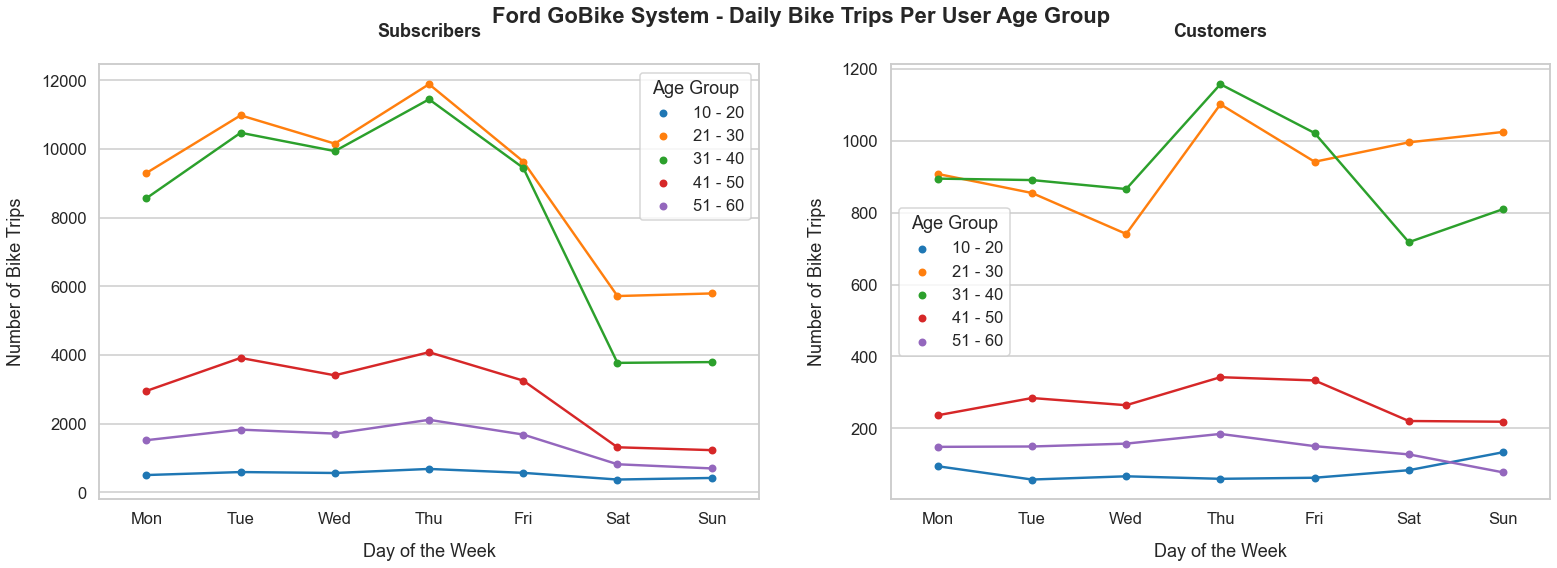

In [5]:
plt.figure(figsize = (26,8))
plt.suptitle('Ford GoBike System - Daily Bike Trips Per User Age Group', fontsize=22, fontweight='bold')

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Comparing daily number of bike trips per subscribers, based on their age group
subscribers_age_df = df_new.query('user_type == "Subscriber"').groupby(['start_day', 'member_age_groups']).agg({'bike_id':'count'}).reset_index()
plt.subplot(1, 2, 1)
sb.pointplot(data = subscribers_age_df, x='start_day', y='bike_id', hue='member_age_groups', scale=0.6, order = days, height=5, aspect=2);
plt.xlabel('Day of the Week', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Subscribers", y = 1.05, fontweight = 'bold');
plt.legend(title='Age Group')

# Comparing daily number of bike trips per customer, based on their age group
customer_age_df = df_new.query('user_type == "Customer"').groupby(['start_day', 'member_age_groups']).agg({'bike_id':'count'}).reset_index()
plt.subplot(1, 2, 2)
sb.pointplot(data = customer_age_df, x='start_day', y='bike_id', hue='member_age_groups', scale=0.6, order = days, height=5, aspect=2);
plt.xlabel('Day of the Week', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Customers", y = 1.05, fontweight = 'bold');
plt.legend(title='Age Group')

## (Visualization 3)

> **Insight:** Is there a relationship between the number of Trips per Day, number of Trips per Hour and User type?

> * Analyzing the behavior of the Customer user type, we can see that the most bike trips happen in hour 17, hour 18 and hour 8 during the weekdays with highest on Thursdays. In the weekend, the hour with the peak of bike trips is 13. The Subscriber user type uses the bike during the weekdays with the peak recorded in hours 8, 17, 18 and 9. 

> * The lowest value showing on the Subscriber scale (500 trips) is higher than the highest value showing on the Customer scale (400 trips). This is because Subscribers had far more rides per day in comparism with the Customers.

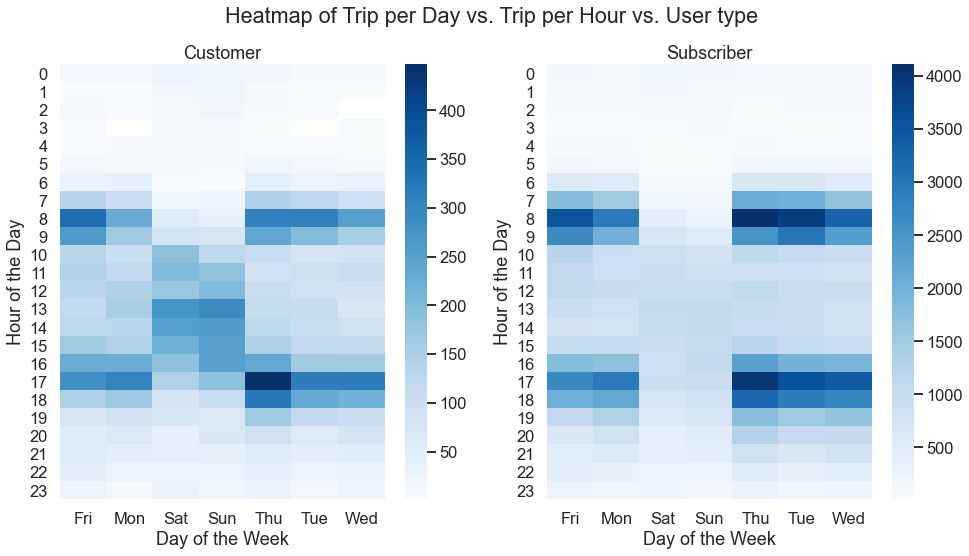

In [6]:
# Let's plot to heatmaps side by side
# One for cutomers and the other for subscribers
plt.figure(figsize = (16,8))
plt.suptitle('Heatmap of Trip per Day vs. Trip per Hour vs. User type')

plt.subplot(1, 2, 1)
customer_users = df_new.query('user_type == "Customer"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
customer_users = customer_users.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(customer_users, cmap = "Blues")
plt.title("Customer")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

plt.subplot(1, 2, 2)
subscriber_users = df_new.query('user_type == "Subscriber"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
subscriber_users = subscriber_users.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(subscriber_users, cmap = "Blues")
plt.title("Subscriber")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

## (Visualization 4)

> **Insight:** What is the relationship between trip duration and user type and also their gender?

> * Looking at the boxplot, the male users rode for lesser duration than the female and the other gender. This could be due to strength, better skills or shorter distance.

> * Interestingly, we can see that higher percentage of customer rides longer trips than subscriber although number of subscriber trip is more than number of customer trip. This implies that the commuting distance for the subscribers is less than the average ride a customer takes.

Text(0, 0.5, 'Duration [sec]')

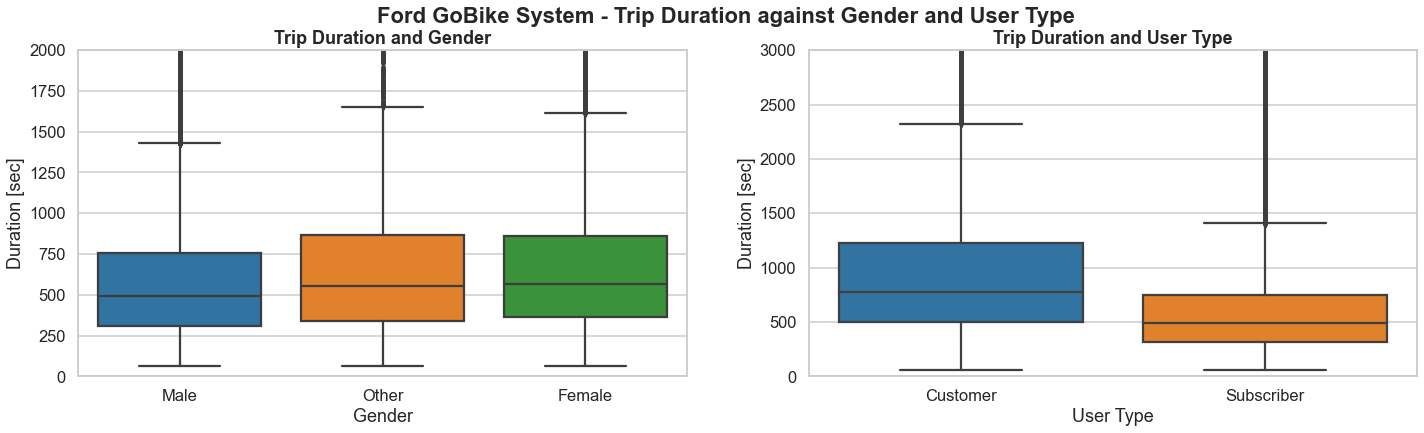

In [7]:
plt.figure(figsize = (24,6))
plt.suptitle('Ford GoBike System - Trip Duration against Gender and User Type', fontsize=22, fontweight='bold')

plt.subplot(1, 2, 1)
sb.boxplot(data = df_new, x = 'member_gender', y = 'duration_sec')
plt.title('Trip Duration and Gender', fontweight='bold')
plt.ylim([0, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration [sec]')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_new, x = 'user_type', y = 'duration_sec')
plt.title('Trip Duration and User Type', fontweight='bold')
plt.ylim([0, 3000])
plt.xlabel('User Type')
plt.ylabel('Duration [sec]')

## (Visualization 5)

> **Insight:** Is there a relationship between the Trip Mean Duration per Day, the Trip Mean Duration per Hour and the Member Gender?

> * Analyzing the mean duration per day and hour in respect to the member gender, we can see that the most bike trips duration for the male happen in hour 3 on wednesday and sunday and hour 2 on wednesday, the most bike trips duration for the female happen in hour 3 on sunday and hour 2 on saturday, while that of the other gender happen in hour 3 on Thursday and hour 7 on sunday. 

> * The maximum value showing on the male mean duration scale is 2500seconds, while that of female is 9000seconds and that of other other gender is 35000seconds. This shows that the male members spend the least time on the road followed by the female members while the other gender members spend the highest time on the road.

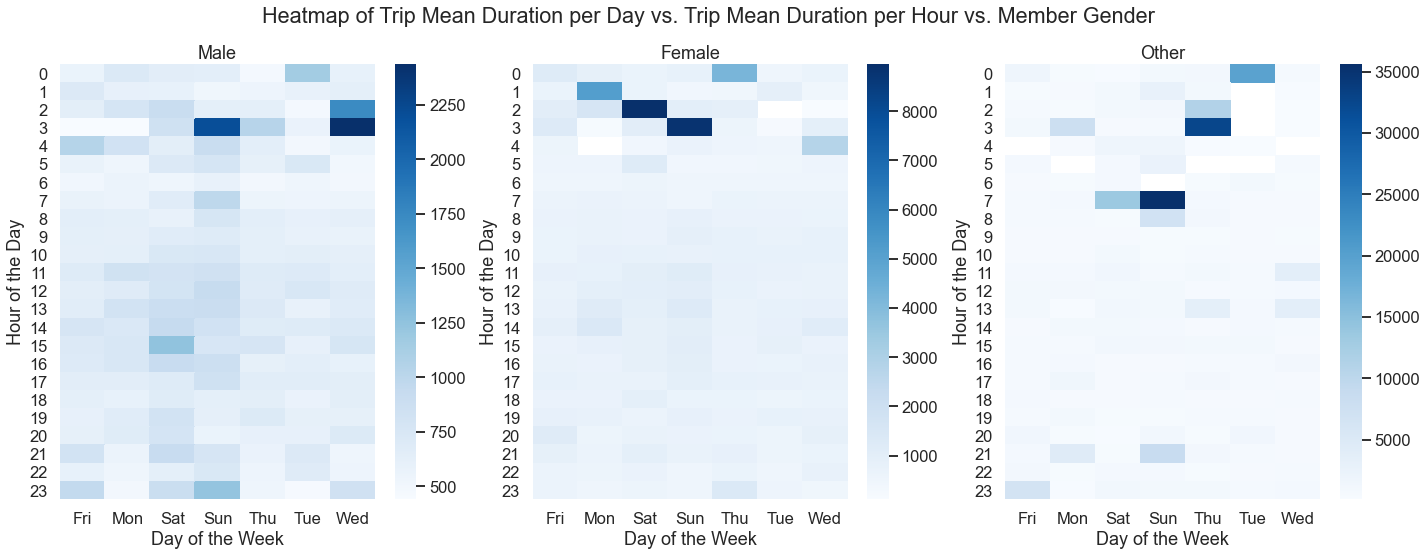

In [8]:
plt.figure(figsize = (24,8))
plt.suptitle('Heatmap of Trip Mean Duration per Day vs. Trip Mean Duration per Hour vs. Member Gender')

plt.subplot(1, 3, 1)
male_users = df_new.query('member_gender == "Male"').groupby(["start_hour", "start_day"])["duration_sec"].mean().reset_index()
male_users = male_users.pivot("start_hour", "start_day", "duration_sec")
sb.heatmap(male_users, cmap = "Blues")
plt.title("Male")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

plt.subplot(1, 3, 2)
female_users = df_new.query('member_gender == "Female"').groupby(["start_hour", "start_day"])["duration_sec"].mean().reset_index()
female_users = female_users.pivot("start_hour", "start_day", "duration_sec")
sb.heatmap(female_users, cmap = "Blues")
plt.title("Female")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

plt.subplot(1, 3, 3)
other_users = df_new.query('member_gender == "Other"').groupby(["start_hour", "start_day"])["duration_sec"].mean().reset_index()
other_users = other_users.pivot("start_hour", "start_day", "duration_sec")
sb.heatmap(other_users, cmap = "Blues")
plt.title("Other")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day");

## Conclusions
>The main findings from the data exploration are:
> * The bikes are being used primarily by commuters to work or school.
> * Most riders use the bikes for short distance trips of distances less than 10[km].
> * most of the trips had their speed between 2[m/s] and 4[m/s]. The mean speed is 3.08[m/s] and 75% of the trips had speed of 3.71[m/s] and below.
> * 74.4% of the users of the bike share system are male, while 23.5% are female and 2.1% are other.
> * The majority of users of the Ford Go Bike System are Subscribers (i.e. users who subscribe to the monthly membership), representing 90.4% of the total users, while Customers represented 9.6%
> * the male users rode for lesser duration than the female and the other gender. The males also rode at higher speed than the females, while females and others rode for longer distance than the males.
> * The commuting distance for the subscribers is less than the average ride a customer takes.
> * Subscribers had far more rides per day in comparism with the Customers, and the saturday and sunday rides are the least.
> * subscriber riders move at higher speed than customers, this could be because they might be rushing to work or school, while customers are mostly tourists around the Bay Area.
> * Customer rode longer trips than subscriber. This explains the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.
> * Most Customer bike trips happen in hour 17, hour 18 and hour 8 during the weekdays with highest on Thursdays. In the weekend, the hour with the peak of bike trips is 13. The Subscriber user type uses the bike during the weekdays with the peak recorded in hours 8, 17, 18 and 9.
> * Subscribers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system. They also lead the spike which occurs across all age groups in Thursdays. Subscribers who fall in the 31-40 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend as the 21-30 year olds on Thursdays. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system followed by the oldest age group, the 51-60 years olds.
> * Customers who fall in the age group between 21-30 years old are the most common age group to use the bike sharing system on Mondays, saturdays and sundays. while the Customers who fall in the 31-40 year old age group are the most common age group to use the bike sharing system on every other day of the week. The youngest age group, the 10-20 years olds are the least common age group to use the bike sharing system except on sundays where they have more rides than the oldest age group, the 51-60 years olds.
> * The most bike trips duration for the male happen in hour 3 on wednesday and sunday and hour 2 on wednesday, the most bike trips duration for the female happen in hour 3 on sunday and hour 2 on saturday, while that of the other gender happen in hour 3 on Thursday and hour 7 on sunday.

>When we include a third variable, the insight became more complete. It essentially amplified the previous findings through different visuals and adding in more variables to compare to other variables.

>Finally, it was interesting to note that the users in the working class age range (21-40year) had very many rides as compared to the other age groups, both in the customer and subscriber categories. Which means that they were not only interested in the bikes for commuting purpose alone but also for vacations and tours.


In [10]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1032874 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Egbua Golden\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Egbua Golden\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Egbua Golden\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Egbua Golden\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Egbua Golden\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    se